# This is a coding challenge is presented by codecademy with minimal prompts. This particular one aims to explore the topic of using Deep Learning in Regression Tasks

> From their original website (Does not include the entire section)

Deep Learning Regression with Admissions Data
Overview
This project is slightly different than most on Codecademy. Instead of a step-by-step tutorial, this project contains a series of open-ended requirements that describe the project you’ll be building. There are many possible ways to fulfill all of these requirements correctly, and you should expect to use the internet, Codecademy, and other resources when you encounter a problem that you cannot easily solve.

Project Goals:

For this project, you will create a deep learning regression model that predicts the likelihood that a student applying to graduate school will be accepted based on various application factors (such as test scores).

## Artificial Neural Netwroks are a very appealing solution when you look at vast amounts of data, and/or very complex interactions between many features that may benift from its ability to capture them. The aim of this notebook is to:
    > Follow the open guided prompts provided
    > Explore how deep learning models are initialized, compiled (taking what type of loss, metrics, and optimizer you want to utilize and montior), fit, and then evaluated.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [7]:
admissions_data = pd.read_csv("admissions_data.csv")

admissions_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
admissions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [9]:
admissions_data.columns = admissions_data.columns.str.strip()

In [10]:
admissions_data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [11]:
admissions_data["GRE Score"].unique()

array([337, 324, 316, 322, 314, 330, 321, 308, 302, 323, 325, 327, 328,
       307, 311, 317, 319, 318, 303, 312, 334, 336, 340, 298, 295, 310,
       300, 338, 331, 320, 299, 304, 313, 332, 326, 329, 339, 309, 315,
       301, 296, 294, 306, 305, 290, 335, 333, 297, 293], dtype=int64)

In [12]:
admissions_data["TOEFL Score"].unique()

array([118, 107, 104, 110, 103, 115, 109, 101, 102, 108, 106, 111, 112,
       105, 114, 116, 119, 120,  98,  93,  99,  97, 117, 113, 100,  95,
        96,  94,  92], dtype=int64)

In [13]:
admissions_data["SOP"].unique()

array([4.5, 4. , 3. , 3.5, 2. , 5. , 1.5, 1. , 2.5])

In [14]:
admissions_data["CGPA"].unique()

array([9.65, 8.87, 8.  , 8.67, 8.21, 9.34, 8.2 , 7.9 , 8.6 , 8.4 , 9.  ,
       9.1 , 8.3 , 8.7 , 8.8 , 8.5 , 9.5 , 9.7 , 9.8 , 9.6 , 7.5 , 7.2 ,
       7.3 , 8.1 , 9.4 , 9.2 , 7.8 , 7.7 , 9.3 , 8.85, 7.4 , 7.6 , 6.8 ,
       8.92, 9.02, 8.64, 9.22, 9.16, 9.64, 9.76, 9.45, 9.04, 8.9 , 8.56,
       8.72, 8.22, 7.54, 7.36, 8.02, 9.36, 8.66, 8.42, 8.28, 8.14, 8.76,
       7.92, 7.66, 8.03, 7.88, 7.84, 8.96, 9.24, 8.88, 8.46, 8.12, 8.25,
       8.47, 9.05, 8.78, 9.18, 9.46, 9.38, 8.48, 8.68, 8.34, 8.45, 8.62,
       7.46, 7.28, 8.84, 9.56, 9.48, 8.36, 9.32, 8.71, 9.35, 8.65, 9.28,
       8.77, 8.16, 9.08, 9.12, 9.15, 9.44, 9.92, 9.11, 8.26, 9.43, 9.06,
       8.75, 8.89, 8.69, 7.86, 9.01, 8.97, 8.33, 8.27, 7.98, 8.04, 9.07,
       9.13, 9.23, 8.32, 8.98, 8.94, 9.53, 8.52, 8.43, 8.54, 9.91, 9.87,
       7.65, 7.89, 9.14, 9.66, 9.78, 9.42, 9.26, 8.79, 8.23, 8.53, 8.07,
       9.31, 9.17, 9.19, 8.37, 7.68, 8.15, 8.73, 8.83, 8.57, 9.68, 8.09,
       8.17, 7.64, 8.01, 7.95, 8.49, 7.87, 7.97, 8.

In [15]:
admissions_data["GRE Score"].unique()

array([337, 324, 316, 322, 314, 330, 321, 308, 302, 323, 325, 327, 328,
       307, 311, 317, 319, 318, 303, 312, 334, 336, 340, 298, 295, 310,
       300, 338, 331, 320, 299, 304, 313, 332, 326, 329, 339, 309, 315,
       301, 296, 294, 306, 305, 290, 335, 333, 297, 293], dtype=int64)

In [16]:
admissions_data["Research"].unique()

array([1, 0], dtype=int64)

#### 1 - This notebook/workflow directly follows the challenges open ended guidelines/prompts.
#### 2 - The focus is to build a neural network capable of predicting the chance of admittance.
#### 3 - The data has been provided and pre-processing is always a necessary step and that involves many things like checking for outliers, nulls, duplicated, .. etc.

In [17]:
admissions_data.isna().any() # No nulls

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [18]:
admissions_data.duplicated().any() # No Duplicate Values

False

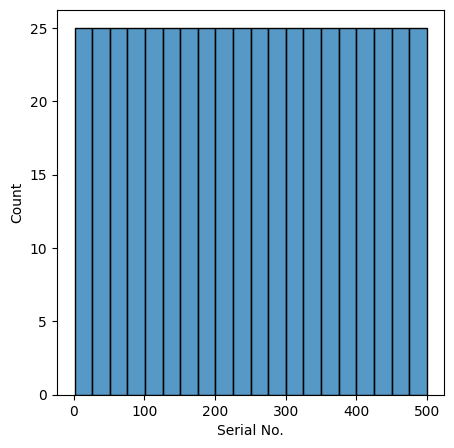

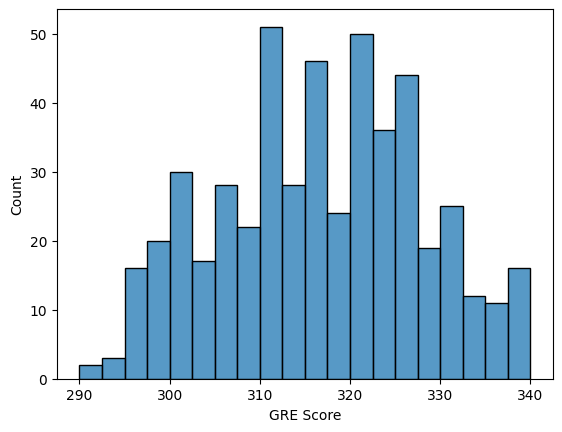

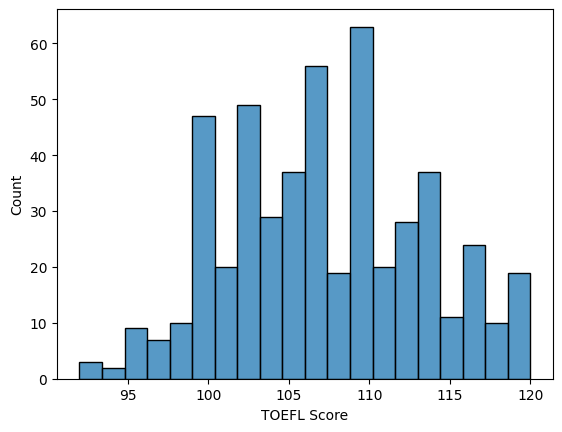

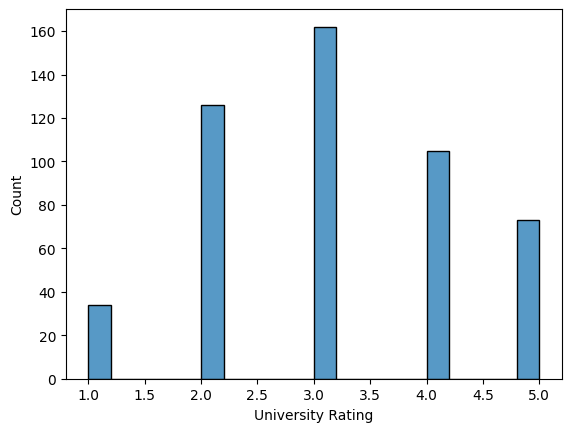

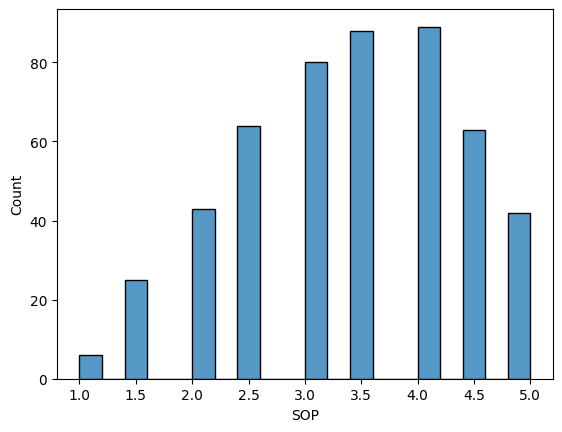

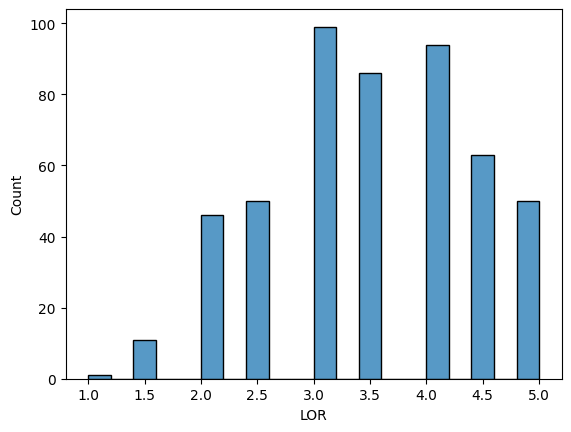

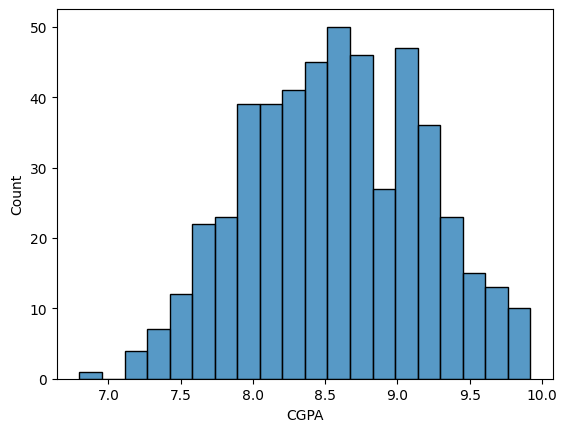

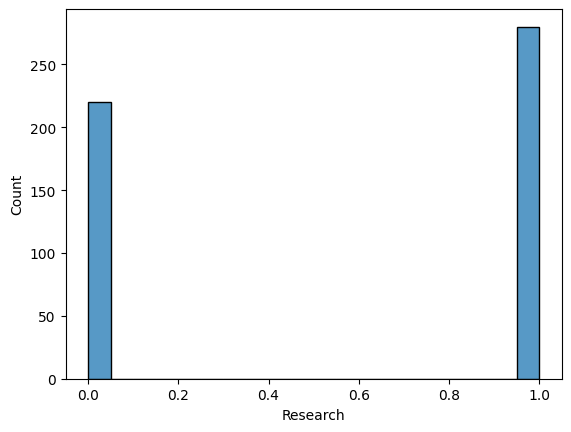

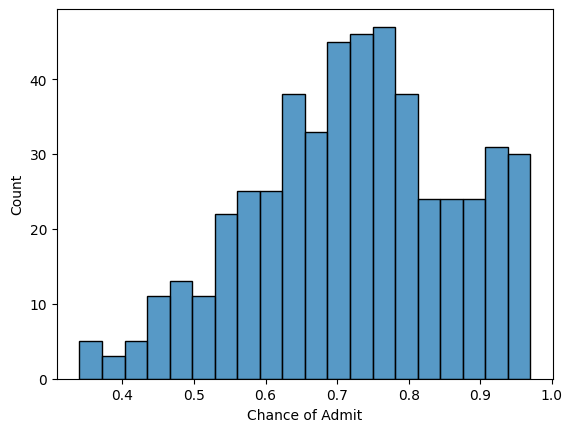

<Figure size 640x480 with 0 Axes>

In [19]:
plt.figure(figsize = (5,5))
for feature in admissions_data.columns:
    sns.histplot(admissions_data[feature],bins=20)
    plt.show()
    plt.clf()

> ### 1- Serial no. does not hold any value so it will be dropped.
> ### 2- Some features are discrete, meaning they are meant to be viewa as categories.
> ### 3- Scores like CGPA and GRE look normally distributed, while TOEFL scores look normally distributed with slight irregularities and the target variable `Chance of Admit` seems left skewed.

## We will be assessing how Neural Networks perform across the predictor variables to predict the chance of admittance.

## Features 
    > GRE scores out of 340.
    > TOEFT scores out of 120.
    > University Ratings out of 5 (University Rating).
    > Statement of Purpose Strength (SOP).
    > Letter of Recommendation Strength (LOR).
    > Has research experience or not (Research).
    > Undergraduate GPA out of 10 (CGPA).
## Label
    > Chance of Admit.

> ### We are trying to predict the chance of admittance.
> ### The Serial No. is not a factor as it is just an index.
> ### All variables are numerically encoded.
> ### We will now just split the features and the labels.

In [20]:
print(admissions_data.columns)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')


In [21]:
features = admissions_data.drop( ["Serial No.","Chance of Admit"],axis=1)
label = admissions_data[["Chance of Admit"]]

## We will now need to split the training set and testing set. A training set for learning and testing set for an unbiased evaluation. 

Note: A validation set could still be used.

In [22]:
from sklearn.model_selection import train_test_split 
x_train, x_test,y_train, y_test = train_test_split(features, label, test_size = 0.20, random_state=42)

In [23]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
# All variables are numerically encoded no One-hot encoding is needed
# The x_train and x_test are returned in numpy arrays, you can wrap them in dataframes

In [24]:
x_train = pd.DataFrame(x_train, columns = features.columns)
x_test = pd.DataFrame(x_test, columns = features.columns)

### Now comes building the Neural Network
    > I will choose the mean square error as the loss function.
    > A good practice would be to start with a few layers at the start, I will start with 2 layers (32 neurons then 16) with relu (non-linear) activation functions and an a single Dense output with no activation function.
    > I will try the Adam optimizer and set the learning rate to 0.01.
    > Additionalty, I will follow the mae, rmse values as an additional metrics.

In [20]:
model_s = tf.keras.Sequential(name="model")
Input = tf.keras.layers.Input(shape = (x_train.shape[1],)) #Placeholder layer for the inputs
model_s.add(Input) # Added Input layer 
model_s.add(tf.keras.layers.Dense(32,activation='relu'))
model_s.add(tf.keras.layers.Dense(16,activation='relu'))
model_s.add(tf.keras.layers.Dense(1))
model_s.compile(loss="mse",metrics=["mae",tf.keras.metrics.RootMeanSquaredError()],optimizer = tf.keras.optimizers.Adam(learning_rate=0.01))
model_s.summary()

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 801 (3.13 KB)

 Trainable params: 801 (3.13 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Another way to initialize the model
model_s2 = tf.keras.Sequential([
    tf.keras.layers.Dense(32,activation='relu',input_shape = (x_train.shape[1],)),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1)
])

model_s2.compile(loss="mse",metrics=["mae",tf.keras.metrics.RootMeanSquaredError()],optimizer = tf.keras.optimizers.Adam(learning_rate=0.01))
model_s2.summary()

C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 32)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 801 (3.13 KB)

 Trainable params: 801 (3.13 KB)

 Non-trainable params: 0 (0.00 B)

In [113]:
# Another way to initialize the model
model_s3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (x_train.shape[1],)),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1)
])

model_s3.compile(loss="mse",metrics=["mae",tf.keras.metrics.RootMeanSquaredError()],optimizer = tf.keras.optimizers.Adam(learning_rate=0.01))
model_s3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 32)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 801 (3.13 KB)

 Trainable params: 801 (3.13 KB)

 Non-trainable params: 0 (0.00 B)

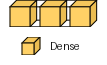

In [127]:
# Visualizing the neural netwrok
import visualkeras
visualkeras.layered_view(model_s3,legend=True)

In [24]:
tf.random.set_seed(42)
model_checking = tf.keras.callbacks.ModelCheckpoint("my_checkpoint.weights.h5",save_weights_only = True)
history = model_s.fit(x_train,y_train,epochs=40,batch_size=10,verbose=1,validation_split= 0.2 ,callbacks = [model_checking]) # Validation handled by Keras

Epoch 1/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.2150 - mae: 0.3328 - root_mean_squared_error: 0.4356 - val_loss: 0.0344 - val_mae: 0.1404 - val_root_mean_squared_error: 0.1855
Epoch 2/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0138 - mae: 0.0967 - root_mean_squared_error: 0.1174 - val_loss: 0.0182 - val_mae: 0.0968 - val_root_mean_squared_error: 0.1349
Epoch 3/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0086 - mae: 0.0737 - root_mean_squared_error: 0.0928 - val_loss: 0.0105 - val_mae: 0.0746 - val_root_mean_squared_error: 0.1025
Epoch 4/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0058 - mae: 0.0584 - root_mean_squared_error: 0.0761 - val_loss: 0.0111 - val_mae: 0.0794 - val_root_mean_squared_error: 0.1052
Epoch 5/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0054 - mae: 0.0573 - root_mean_squared_error: 0.0732 - val_loss: 0.0107 - val_mae: 0.0778 - val_root_mean_squared_error: 0.1036
Epoch 6/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0

> ### Each epoch processes the entire training set once. Since we have specified a batch size of 10, the fitting method will iterate through mini-batches until the full training set has been covered.

         Given a training set of size 360 and a batch size of 10, there will be 32 mini-batches (320 / 10) in each epoch.

In [25]:
loss, val_mae, val_rmse = model_s3.evaluate(x_test,y_test) # We Want all values to be as low as possible but will be a little higher since the model's hyperparameters will have been tuned specifically for the validation dataset

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1309 - mae: 1.0232 - root_mean_squared_error: 1.0631  


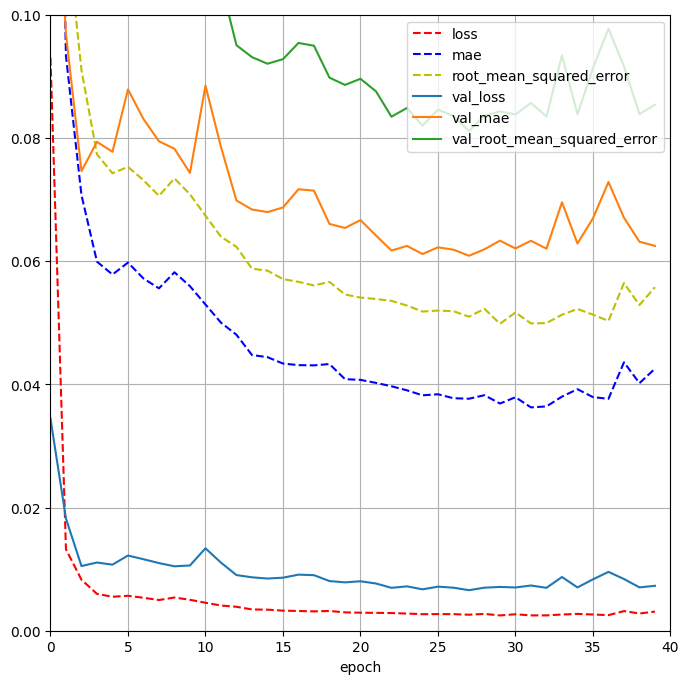

<Figure size 640x480 with 0 Axes>

In [26]:
pd.DataFrame(history.history).plot(
    figsize = (8,8),xlim = [0,40], ylim = [0,0.1], grid=True, xlabel = "epoch", style = ['r--','b--','y--']
)
plt.show()
plt.clf()

### The training loss is better than the validation loss which could indicate overfitting. There are ways to counter it, and I will be using a regularization method called drop out.

drop out : A method of regularization that drops some of the outputs of a layer (or inputs to the next layer), essentially making them 0 (using a rate), in order to simplify the model. (Adds bias)

Dropout with Keras documentation link: [Dropout](https://keras.io/api/layers/regularization_layers/dropout/).

### I will also include Early stopping that stops the model from training after some epochs. This is done in order to save resources and time and is a great way to check the optimal epochs.

In [27]:
model_regularized = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (x_train.shape[1],)),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

model_regularized.compile(loss="mse",metrics=["mae",tf.keras.metrics.RootMeanSquaredError()],optimizer = tf.keras.optimizers.Adam(learning_rate=0.01))
model_regularized.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 32)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 801 (3.13 KB)

 Trainable params: 801 (3.13 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
#This call back will wait for 5 epochs before stopping if no sign of process on the "validation loss" is noticed. It will also roll back to the best model at the end of training
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 5,restore_best_weights = True) 
history_Reg = model_regularized.fit(x_train,y_train,epochs=40,batch_size=10,verbose=1,validation_split = 0.2,callbacks = [model_checking,early_stopping]) 

Epoch 1/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2774 - mae: 0.4043 - root_mean_squared_error: 0.5123 - val_loss: 0.0216 - val_mae: 0.1156 - val_root_mean_squared_error: 0.1470
Epoch 2/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0473 - mae: 0.1737 - root_mean_squared_error: 0.2173 - val_loss: 0.0083 - val_mae: 0.0729 - val_root_mean_squared_error: 0.0910
Epoch 3/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0268 - mae: 0.1342 - root_mean_squared_error: 0.1635 - val_loss: 0.0076 - val_mae: 0.0648 - val_root_mean_squared_error: 0.0872
Epoch 4/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0221 - mae: 0.1211 - root_mean_squared_error: 0.1485 - val_loss: 0.0051 - val_mae: 0.0525 - val_root_mean_squared_error: 0.0716
Epoch 5/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0195 - mae: 0.1122 - root_mean_squared_error: 0.1391 - val_loss: 0.0059 - val_mae: 0.0623 - val_root_mean_squared_error: 0.0769
Epoch 6/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0

### Stopped around epoch 17.

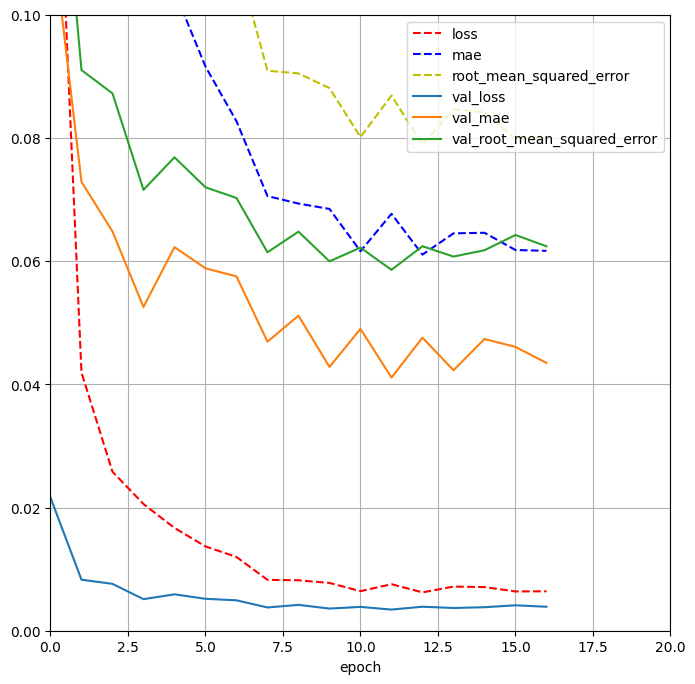

<Figure size 640x480 with 0 Axes>

In [30]:
pd.DataFrame(history_Reg.history).plot(
    figsize = (8,8),xlim = [0,20], ylim = [0,0.1], grid=True, xlabel = "epoch", style = ['r--','b--','y--']
)
plt.show()
plt.clf()

### The validation loss is now lower than the training loss which indicates that regularization + early stopping help avert overfitting to the training data.
------------------------------

## We can also take a look at an interactive visualization tool called TensorBoard. A great way to view learning curves, compare metrics across runs, visulaize the computation graph, view images generated by your model, and many more

### Tensorboard saves each run in logfiles (event files). We want to make the server point to and monitor these logs, it pick up changes automatically. This allows us to visualize and compare data across runs without getting anything mixed up.

In [31]:
from pathlib import Path
from time import strftime

In [32]:
# A function to handle naming the logs
def get_running_logdir(rootdir = "log"):
    return Path(rootdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

logdir = get_running_logdir()

In [33]:
model_r = tf.keras.models.clone_model(model_regularized) # A way to clone a model. Note that you will need to compile again as the optimizer
model_r.compile(loss="mse",metrics=["mae",tf.keras.metrics.RootMeanSquaredError()],optimizer = tf.keras.optimizers.Adam(learning_rate=0.01))
model_r.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 32)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 801 (3.13 KB)

 Trainable params: 801 (3.13 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Profile batches between 10 and 29. We avoided starting from the first batch as the model will take some batches to warm up, it also uses resources, so it is better not do it for every batch.
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, profile_batch = (10,25))
history_R = model_r.fit(x_train,y_train,epochs=40,batch_size=10,verbose=1,validation_split=0.2,callbacks = [model_checking,early_stopping,tensorboard_callback]) 

Epoch 1/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.4241 - mae: 0.4930 - root_mean_squared_error: 0.6242 - val_loss: 0.0413 - val_mae: 0.1823 - val_root_mean_squared_error: 0.2032
Epoch 2/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0577 - mae: 0.1917 - root_mean_squared_error: 0.2400 - val_loss: 0.0095 - val_mae: 0.0758 - val_root_mean_squared_error: 0.0975
Epoch 3/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0293 - mae: 0.1359 - root_mean_squared_error: 0.1708 - val_loss: 0.0081 - val_mae: 0.0676 - val_root_mean_squared_error: 0.0900
Epoch 4/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0187 - mae: 0.1097 - root_mean_squared_error: 0.1366 - val_loss: 0.0053 - val_mae: 0.0539 - val_root_mean_squared_error: 0.0725
Epoch 5/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0182 - mae: 0.1092 - root_mean_squared_error: 0.1349 - val_loss: 0.0067 - val_mae: 0.0678 - val_root_mean_squared_error: 0.0821
Epoch 6/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./log

### After the networks learns, validated, and evaluated all sets, we can evaluate the evaluation metrics in order to proceed with Hyperparamter tuning.

> ### In order to utilize Grid Search or Random Search by scikit-learn, we'll have to wrap our neural network using the `KerasRegressor` wrap (or `KerasClassifier` for classification tasks). Another way is to use the keras tuner, which I will be following.

In [25]:
import keras_tuner as kt

In [26]:
# We will have to define a function that builds, compiles, and returns a keras model. It will take a kt.HyperParameters object used to define them alongside their range.
def build_model(hp):
    n_hidden = hp.Int("n_hidden",min_value = 0,max_value=8,default=2)
    n_neurons = hp.Int("n_neurons",min_value = 16,max_value=128)
    learning_rate = hp.Float("learning_rate",min_value = 1e-4,max_value=1e-2,sampling="log")
    rate = hp.Float("rate", min_value = 0, max_value=1)
    optimizer = hp.Choice("optimizer", values=['sgd','adam'])
    
    if optimizer == "adam":
        optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)
    else:
        optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape = (x_train.shape[1],)))
    for i in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation = "relu"))
        model.add(tf.keras.layers.Dropout(rate))
    model.add(tf.keras.layers.Dense(1))
    model.compile(loss="mse",metrics=["mae",tf.keras.metrics.RootMeanSquaredError()],optimizer = optimizer)
    return model

In [27]:
# I will use RandomSearch version

random_search_tuner = kt.RandomSearch(build_model,objective="val_loss",max_trials=5,overwrite=True,directory="chance_of_addmitance_tuning_random",project_name = "rnd_search",seed=42)

In [28]:
random_search_tuner.search(x_train,y_train,epochs=10,validation_split = 0.20)

Trial 5 Complete [00h 00m 04s]
val_loss: 0.28281813859939575

Best val_loss So Far: 0.004169277381151915
Total elapsed time: 00h 00m 24s


In [33]:
top3 = random_search_tuner.get_best_models(num_models=3)
Best_model = top3[0]

In [34]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 8,
 'n_neurons': 85,
 'learning_rate': 0.006718710759425462,
 'rate': 0.09033985426934954,
 'optimizer': 'adam'}

### After assessing the results of the hyperparamter tuning (validation loss of 0.004169). I will continue training the best model for some epochs on the full training set (Including the 0.2 validation split back in) then test it on the test set.

In [35]:
Best_model.fit(x_train,y_train,epochs=10) 

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0315 - mae: 0.1453 - root_mean_squared_error: 0.1758
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0122 - mae: 0.0825 - root_mean_squared_error: 0.1104 
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0083 - mae: 0.0717 - root_mean_squared_error: 0.0908 
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0074 - mae: 0.0688 - root_mean_squared_error: 0.0857 
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0067 - mae: 0.0636 - root_mean_squared_error: 0.0820 
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mae: 0.0631 - root_mean_squared_error: 0.0811 
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067 - mae: 0.0643 - root_mean_squared_error: 0.0818 
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mae: 0.0599 - root_mean_squared_error: 0.0790 
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0067 - mae: 0.0621 - root_mea

In [37]:
test_loss, test_mae, test_rmse = Best_model.evaluate(x_test,y_test)
print(f"\n \n mse loss: {test_loss}, mae: {test_mae}, rmse: {test_rmse}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0063 - mae: 0.0607 - root_mean_squared_error: 0.0793 

 
 mse loss: 0.005880842916667461, mae: 0.05862955003976822, rmse: 0.07668665051460266


In [38]:
# Checking the r2_score
from sklearn.metrics import r2_score
y_pred = best_model.predict(x_test)
score = r2_score(y_test,y_pred)
print(f"r2: {score}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
r2: 0.7623864412307739


### An R-squared value of 0.76 indicates that approximately 76% of the variance in the dependent variable can be explained by the independent variable(s) in your model. This shows a strong relationship between the predictors and the target variable.